In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2

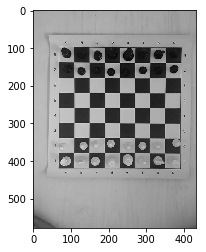

In [2]:
img = cv2.imread("Jogos/1/0.jpg", 0)

plt.imshow(img, cmap = "gray")

In [3]:
aux = np.zeros((400, 400), dtype = np.float32)
pts_aux = np.float32([[0,0],[aux.shape[1], 0],[aux.shape[1],aux.shape[0]],[0,aux.shape[0]]])

In [4]:
points = []
ix,iy = -1,-1

def get_points(event,x,y,flags,param):
    global ix,iy,drawing,mode, points

    if event == cv2.EVENT_LBUTTONDOWN:
        ix,iy = x,y
        #print(x, y)
        points.append([x, y])

img_r = cv2.resize(img, (int(img.shape[1]/1.4), int(img.shape[0]/1.4)))

#descomentar abaixo para clicar na tela

# cv2.imshow("click", img_r)
# cv2.setMouseCallback('click', get_points)

# while (1):
#     k = cv2.waitKey(1) & 0xFF
#     if k == ord('q') or k == 27:
#         break
        
# cv2.destroyAllWindows()


# pts1 = np.float32(points[:4])

In [5]:
#pts1 = np.array([[481., 156.], [852., 158.], [852., 522.], [478., 523.]], dtype = np.float32)

pts1 = np.array([[ 49.,  71.],[282.,  73.],[280., 302.],[ 49., 301.]], dtype = np.float32)

In [6]:
M = cv2.getPerspectiveTransform(pts1, pts_aux)

In [7]:
perspectiva = cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT)

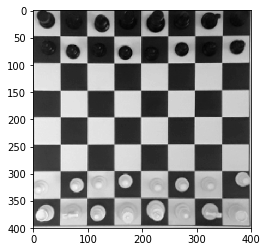

In [8]:
plt.imshow(perspectiva, cmap = "gray")

In [10]:
pts1 

array([[ 49.,  71.],
       [282.,  73.],
       [280., 302.],
       [ 49., 301.]], dtype=float32)

In [11]:
lst = []
for i in range(8):
    for j in range(8):
        lst.append(perspectiva[perspectiva.shape[1]*i//8:perspectiva.shape[1]*(i+1)//8, perspectiva.shape[0]*j//8:perspectiva.shape[0]*(j+1)//8])

In [12]:
np.array(lst).shape

(64, 50, 50)

In [13]:
array = np.array(lst).reshape(8, 8, 50, -1)

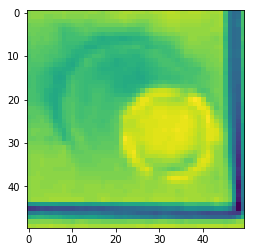

In [14]:
plt.imshow(array[7, 7])

In [15]:
import os
files = []
# r=root, d=directories, f = files
for r, d, f in os.walk("Jogos/1/"):
    for file in f:
        if '.jpg' in file:
            files.append(os.path.join(r, file))

In [16]:
import re

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

files.sort(key=natural_keys)

In [17]:
perspectiva = []
lst_geral = []

for path in files:
    img = cv2.imread(path, 0)
    M = cv2.getPerspectiveTransform(pts1, pts_aux)
    img_r = cv2.resize(img, (int(img.shape[1]/1.4), int(img.shape[0]/1.4)))
    perspectiva.append(cv2.warpPerspective(img_r, M,(aux.shape[1], aux.shape[0]), aux, borderMode = cv2.BORDER_TRANSPARENT))
    lst = []
    for i in range(8):
        for j in range(8):
            lst.append(perspectiva[-1][perspectiva[-1].shape[1]*i//8:perspectiva[-1].shape[1]*(i+1)//8, perspectiva[-1].shape[0]*j//8:perspectiva[-1].shape[0]*(j+1)//8])
    array = np.array(lst).reshape(8, 8, 50, -1)
    lst_geral.append(array)

In [18]:
array_imgs = np.array(perspectiva)
array_geral = np.array(lst_geral)

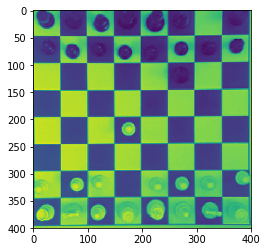

In [19]:
plt.imshow(perspectiva[2])

In [20]:
array_geral.shape

(49, 8, 8, 50, 50)

In [24]:
#np.save("Jogos/1/array_geral_1", array_geral)

In [21]:
def center_image(img, p = 0.35, boolean = True):
    if boolean == False:
        return img
    w, h = img.shape
    cw, ch = w//2, h//2
    #p = 0.4 #max 0.5
    return img[int(cw - w*p): int(cw + w*p), int(ch - h*p) : int(ch + h*p)]

(35, 35)


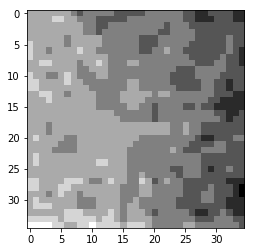

In [22]:
_ = center_image(array_geral[1][3, 3], p = 0.35)
print(_.shape)
# print(_)
plt.imshow(_, cmap = "gray")

In [ ]:
def check_diff(a, b):
    M = max(a, b)
    return abs(a-b)/M

def dist_imgs(a, b, bins = 256):
    hista = cv2.calcHist([a],[0],None,[bins],[0,256]).ravel()
    histb = cv2.calcHist([b],[0],None,[bins],[0,256]).ravel()
    
    hista_n = hista/np.linalg.norm(hista)
    histb_n = histb/np.linalg.norm(histb)
    
    return 1 - check_diff(np.std(hista), np.std(histb))
    
    return np.max(np.correlate(hista_n, histb_n, "full"))

In [ ]:
dist_imgs(array_geral[0][3, 3], array_geral[1][3, 3])

In [ ]:
dist_imgs(array_geral[3][2, 5], array_geral[4][2, 5])

In [ ]:
def movement(array_geral, jogada = 1, use_center = False, p = 0.35):
    imgs = (jogada-1, jogada)
    lst, two_low = [], []
    
#     prev = center_image(array_geral[imgs[0]], p = p, boolean = use_center)
#     curr = center_image(array_geral[imgs[1]], p = p, boolean = use_center)
    
    for i in range(8):
        for j in range(8):
            prev = center_image(array_geral[imgs[0]][i, j], p = p, boolean = use_center)
            curr = center_image(array_geral[imgs[1]][i, j], p = p, boolean = use_center)
            dist_imgs(prev, curr)
            lst.append(dist_imgs(prev, curr))
    lst = np.array(lst).reshape(8, 8)
    
    for i in range(2):
        idx = np.argmin(lst, axis = None) 
        ind = np.unravel_index(idx, lst.shape)

        two_low.append(ind)
    
        lst[ind[0], ind[1]] = 1
    return np.array(two_low)

In [ ]:
%%time

for i in range(1, 6):
    print("Jogada {}: \n {}".format(i, movement(array_geral, jogada = i, use_center = False, p = 0.35)))

Correto:

Jogada 1:
##### 4 3
##### 6 3
Jogada 2:
##### 1 5
##### 3 5
Jogada 3:
##### 6 2
##### 4 2
Jogada 4:
##### 0 6
##### 2 5
Jogada 5:
##### 7 6
##### 5 5

In [ ]:
%%time
for i in range(1, 6):
    print("Jogada {}: \n {}".format(i, movement(array_geral, jogada = i, use_center = True, p = 0.45)))

In [ ]:
def debug_step(array_geral, n, pos, function = dist_imgs,  center = False, p = 0.35, bins = 32):
    fig, axs = plt.subplots(1, 3, figsize = (20, 6))
    
    img1 = array_geral[n][pos[0], pos[1]]
    img2 = array_geral[n+1][pos[0], pos[1]]
    
    if center == True:
        img1 = center_image(img1, p = p)
        img2 = center_image(img2, p = p)
    
    h1 = cv2.calcHist([img1],[0],None,[bins],[0,256]).ravel()
    h2 = cv2.calcHist([img2],[0],None,[bins],[0,256]).ravel()
    
    
    axs[0].imshow(img1)
    axs[1].imshow(img2)
    
    axs[2].plot(h1)
    axs[2].plot(h2)
    
    return(img1, img2, h1, h2, function(img1, img2))
    
    #return dist_imgs(array_geral[n][pos[0], pos[1]], array_geral[n+1][pos[0], pos[1]])

In [ ]:
debug_step(array_geral, 35, (0, 3), center = False, p = 0.5, bins = 256)[-1]

In [ ]:
###

In [ ]:
%%time

jogadas = []
for i in range(1, 49):
    jogadas.append(movement(array_geral, jogada = i, use_center = False, p = 0.35))
    
jogadas = np.array(jogadas)

In [ ]:
#jogadas

In [ ]:
def matrix_to_chess_notation(array):
    pos1, pos2 = array
    l1, n1 = chr(97 + pos1[1]), 8 - pos1[0]
    l2, n2 = chr(97 + pos2[1]), 8 - pos2[0]
    return ("{}{}{}{}".format(l1, n1, l2, n2), "{}{}{}{}".format(l2, n2, l1, n1))

In [ ]:
array_jogadas = np.array([matrix_to_chess_notation(x) for x in jogadas])

In [ ]:
array_jogadas

In [ ]:
array_jogadas[12] = np.array(["e1g1", "g1e1"])

In [ ]:
##

In [ ]:
import chess
import chess.svg


board = chess.Board()

In [ ]:
def push_board(board, move):
    try:
        board.push_uci(move[0])
        return
    except:
        try:
            board.push_uci(move[1])
            return 
        except:
            print("Erro!")
            return -1

In [ ]:
def jogo_ate_i(array_de_jogadas, i = 9999):
    board = chess.Board()
    for jogada in array_de_jogadas[:i]:
        push_board(board, jogada)
    return board

In [ ]:
jogo_ate_i(array_jogadas, i = 30)

In [ ]:
def test_f(a, b):
    a1 = np.sum(cv2.Canny(center_image(a, boolean=True), 0, 25))/(255)
    b1 = np.sum(cv2.Canny(center_image(b, boolean=True), 0, 25))/(255)
    return abs(a1-b1)

In [ ]:
*a, score = debug_step(array_geral, 35, (4, 7), center = False, function = test_f)
score

In [ ]:
*a, score = debug_step(array_geral, 35, (0, 2), center = False, function = test_f)
score

In [ ]:
fgbg = cv2.createBackgroundSubtractorMOG2()

fgmask = fgbg.apply(center_image(array_geral[35][4, 7], boolean = False))
fgmask = fgbg.apply(center_image(array_geral[36][4, 7], boolean = False))

plt.imshow(fgmask)

In [ ]:
plt.imshow(cv2.Canny(center_image(array_geral[23][5, 5]), 0, 25))

In [ ]:
np.sum(cv2.Canny(center_image(array_geral[36][4, 7]), 0, 25))/(255)

In [ ]:
### AFONSO

In [ ]:
def filled(a, t=0.8, p=False):
    # Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.1)

    # Set flags (Just to avoid line break in the code)
    flags = cv2.KMEANS_PP_CENTERS

    # Apply KMeans
    compactness,labels,centers = cv2.kmeans(a.reshape(-1,1).astype(np.float32),3,None,criteria,10,flags)
    if p:
        plt.imshow(np.array(labels).reshape(a.shape))
    return float(max(np.sum(labels ==0),np.sum(labels ==1),np.sum(labels ==2) ))/len(labels) < t, labels

In [ ]:
jogos = []
for i in range(6):
    pecas= []
    for y in range(8):
        for x in range(8):
            pecas.append(filled(array_geral[i][y,x])) 
    jogos.append(pecas)
jogos = np.array(jogos).reshape(6,8,8)

In [ ]:
fig, axs = plt.subplots(1, 6, figsize = (20, 6))
for i,jogo in enumerate(jogos):
    axs[i].imshow(jogo)

In [ ]:

correto = np.array([[[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [False, False, False,  True, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [ True,  True,  True, False,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True, False,  True,  True],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False,  True, False, False],
        [False, False, False,  True, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [ True,  True,  True, False,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True, False,  True,  True],
        [False, False, False, False, False, False, False, False],
        [False, False, False, False, False,  True, False, False],
        [False, False,  True,  True, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [ True,  True, False, False,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True,  True, False,  True],
        [ True,  True,  True,  True,  True, False,  True,  True],
        [False, False, False, False, False,  True, False, False],
        [False, False, False, False, False,  True, False, False],
        [False, False,  True,  True, False, False, False, False],
        [False, False, False, False, False, False, False, False],
        [ True,  True, False, False,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True,  True, False,  True],
        [ True,  True,  True,  True,  True, False,  True,  True],
        [False, False, False, False, False,  True, False, False],
        [False, False, False, False, False,  True, False, False],
        [False, False,  True,  True, False, False, False, False],
        [False, False, False, False, False,  True, False, False],
        [ True,  True, False, False,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True, False,  True]]])

In [ ]:
it = 10
erros=0
fig, axs = plt.subplots(1, 2, figsize = (20, 6))
for j in range(it):
    jogos = []
    for i in range(6):
        pecas= []
        for y in range(8):
            for x in range(8):
                peca,label = filled(array_geral[i][y,x], t = 0.8)
                pecas.append(peca)
                if peca != correto[i][y,x]:
                    axs[0].imshow(label.reshape(50,50))
                    axs[1].imshow(array_geral[i][y,x])
                    
        jogos.append(pecas)
    jogos = np.array(jogos).reshape(6,8,8)
    erros += np.sum(np.bitwise_xor(jogos,correto))
    print(j)
print(erros)
erros_p=float(erros)/(it*(len(np.ravel(correto))))
print("tivemos {}% de erros ({} erros) em {} lances".format(erros_p*100, erros, it*len(np.ravel(correto))))